In [1]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('index2018.csv')
df=data.copy()
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [3]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [4]:
df.set_index('date',inplace=True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [5]:
df=df.asfreq('b')

In [6]:
df.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [7]:
df['spx']=df['spx'].fillna(method='ffill')


In [8]:
df['ftse']=df['ftse'].fillna(method='bfill')

In [9]:
df['dax']=df['dax'].fillna(df['dax'].mean())

In [10]:
df['market_value']=df['ftse']
del df['ftse']
df.head()

,spx,dax,nikkei,market_value
date,,,,
1994-01-07,469.90,2224.95,18124.01,3445.98
1994-01-10,475.27,2225.00,18443.44,3440.58
1994-01-11,474.13,2228.10,18485.25,3413.77
1994-01-12,474.17,2182.06,18793.88,3372.02
1994-01-13,472.47,2142.37,18577.26,3360.01


In [11]:
df.isnull().sum()

spx             0
dax             0
nikkei          8
market_value    0
dtype: int64

## ARIMA(1,1,1)

In [12]:
model_ar1_i1_ma1=ARIMA(df.market_value,order=(1,1,1))
results_ar1_i1_ma1=model_ar1_i1_ma1.fit()
results_ar1_i1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34417.629
Method:                       css-mle   S.D. of innovations             58.269
Date:                Sun, 06 Feb 2022   AIC                          68843.257
Time:                        16:30:23   BIC                          68870.235
Sample:                    01-10-1994   HQIC                         68852.605
                         - 01-29-2018                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6751      0.581      1.161      0.246      -0.464       1.815
ar.L1.D.market_value     0.8343      0.077     10.770      0.000       0.682       0.986
ma.L1.D.market_value    -0.8690      0.070    -12.452      0.000      -1.006      -0.732
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1987           +0.0000j            1.1987            0.0000
MA.1            1.1507           +0.0000j            1.1507            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
## arima(1,1,1) for prices is quite similar to arma(1,1) for returns

## Residuals for ARIMA(1,1,1)

In [14]:
df['res_ar1_i1_ma1']=results_ar1_i1_ma1.resid

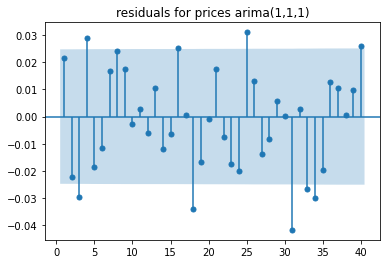

In [15]:
sgt.plot_acf(df.res_ar1_i1_ma1[1:],zero=False,lags=40)
plt.title('residuals for prices arima(1,1,1)')
plt.show()

In [16]:
## since 3 and 4 lag are highly significant so we we will incorporate high lag arima model

## Higher lag ARIMA models

In [17]:
def llr_test(mod_1,mod_2,DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    P=chi2.sf(LR,DF).round(3)
    return P

In [18]:
model_ar1_i1_ma2=ARIMA(df.market_value,order=(1,1,2))
results_ar1_i1_ma2=model_ar1_i1_ma2.fit()
model_ar1_i1_ma3=ARIMA(df.market_value,order=(1,1,3))
results_ar1_i1_ma3=model_ar1_i1_ma3.fit()
model_ar2_i1_ma1=ARIMA(df.market_value,order=(2,1,1))
results_ar2_i1_ma1=model_ar2_i1_ma1.fit()
model_ar3_i1_ma1=ARIMA(df.market_value,order=(3,1,1))
results_ar3_i1_ma1=model_ar3_i1_ma1.fit()
model_ar3_i1_ma2=ARIMA(df.market_value,order=(3,1,2))
results_ar3_i1_ma2=model_ar3_i1_ma2.fit(start_ar_lags=5)

In [19]:
print('arima(1,1,1):', results_ar1_i1_ma1.llf ,results_ar1_i1_ma1.aic)
print('arima(1,1,2):', results_ar1_i1_ma2.llf ,results_ar1_i1_ma2.aic)
print('arima(1,1,3):', results_ar1_i1_ma3.llf ,results_ar1_i1_ma3.aic)
print('arima(2,1,1):', results_ar2_i1_ma1.llf ,results_ar2_i1_ma1.aic)
print('arima(3,1,1):', results_ar3_i1_ma1.llf ,results_ar3_i1_ma1.aic)
print('arima(3,1,2):', results_ar3_i1_ma2.llf ,results_ar3_i1_ma2.aic)



arima(1,1,1): -34417.6285851502 68843.2571703004
arima(1,1,2): -34413.485933551776 68836.97186710355
arima(1,1,3): -34410.94117134848 68833.88234269696
arima(2,1,1): -34413.34971143022 68836.69942286045
arima(3,1,1): -34412.39717326593 68836.79434653185
arima(3,1,2): -34410.8087635047 68835.6175270094


In [20]:
## since arima (1,1,1) and arima(1,1,2) are both nested inside arima(1,1,3) so here we need to run llr test between them 

In [21]:
llr_test(model_ar1_i1_ma1,model_ar1_i1_ma3)

0.0

In [22]:
## this suggest that higher model is better predictor

In [23]:
 llr_test(model_ar1_i1_ma2,model_ar1_i1_ma3)

0.024

In [24]:
##this also suggest that higher model is better predictor

## residuals for arima(1,1,3)

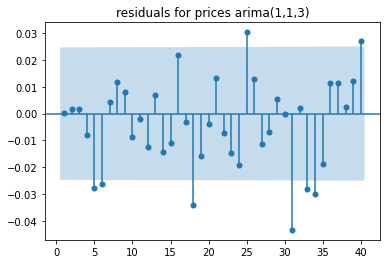

In [25]:
df['res_ar1_i1_ma3']=results_ar1_i1_ma3.resid
sgt.plot_acf(df.res_ar1_i1_ma3[1:],zero=False,lags=40)
plt.title('residuals for prices arima(1,1,3)')
plt.show()

In [26]:
## since 6th lag coefficient is higly significant so ARIMA(6,16) is the better choice and so we do hit and trial betwwen lot of ooptions and we found that ARIMA(5,1,1) and ARIMA(6,1,3) 

In [27]:
model_ar5_i1_ma1=ARIMA(df.market_value,order=(5,1,1))
results_ar5_i1_ma1=model_ar5_i1_ma1.fit(start_ar_lags=11)
model_ar6_i1_ma3=ARIMA(df.market_value,order=(6,1,3))
results_ar6_i1_ma3=model_ar6_i1_ma3.fit(start_ar_lags=13)

In [28]:
## we also call arima(1,1,3) to comapre all three here and choose the best one

In [29]:
print('arima(1,1,3):', results_ar1_i1_ma3.llf ,results_ar1_i1_ma3.aic)
print('arima(5,1,1):', results_ar5_i1_ma1.llf ,results_ar5_i1_ma1.aic)
print('arima(6,1,3):', results_ar6_i1_ma3.llf ,results_ar6_i1_ma3.aic)

arima(1,1,3): -34410.94117134848 68833.88234269696
arima(5,1,1): -34406.637913650644 68829.27582730129
arima(6,1,3): -34404.95889429994 68831.91778859988


In [30]:
## since llr value of arima(6,1,3) is highest and aic value being lowest so it is the better option from three
## sice arma(1,1,3) and arma(5,1,1) are nested inside arima(6,1,3) so need check the llr test for them for complete surity

In [31]:
llr_test(model_ar1_i1_ma3,model_ar6_i1_ma3,DF=5)

0.035

In [32]:
llr_test(model_ar5_i1_ma1,model_ar6_i1_ma3,DF=3)

0.34

In [33]:
##so this suggest that arima(5,1,1) is better model than arima(6,1,3) and arima(6,1,3) is better than arima(1,1,3)
## so finally choosing arima(5,1,1) as better option after llr test

## residual for arima(5,1,1)

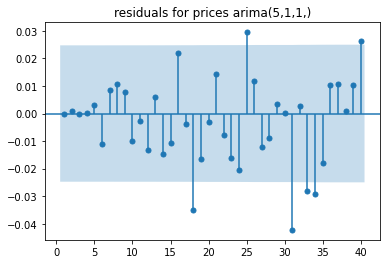

In [34]:
df['res_ar5_i1_ma1']=results_ar5_i1_ma1.resid
sgt.plot_acf(df.res_ar5_i1_ma1[1:],zero=False,lags=40)
plt.title('residuals for prices arima(5,1,1,)')
plt.show()

## Models with higher level of integration(d>1)

In [35]:
## we are doing this because we need to conifrm that d=1 was the stationary data 
## and to confirm this we will use 'delta' series(delta market_value) instead of market_value series and make arima(1,0,1) model and check its stationarity

In [36]:
df['delta_prices'] =df.market_value.diff(1)

In [37]:
model_delta_ar1_i0_ma1=ARIMA(df.delta_prices[1:],order=(1,0,1))
results_delta_ar1_i0_ma1=model_delta_ar1_i0_ma1.fit()
results_delta_ar1_i0_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 6276
Model:                     ARMA(1, 1)   Log Likelihood              -34417.629
Method:                       css-mle   S.D. of innovations             58.269
Date:                Sun, 06 Feb 2022   AIC                          68843.257
Time:                        16:31:20   BIC                          68870.235
Sample:                    01-10-1994   HQIC                         68852.605
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6751      0.581      1.161      0.246      -0.464       1.815
ar.L1.delta_prices     0.8343      0.077     10.770      0.000       0.682       0.986
ma.L1.delta_prices    -0.8690      0.070    -12.452      0.000      -1.006      -0.732
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1987           +0.0000j            1.1987            0.0000
MA.1            1.1507           +0.0000j            1.1507            0.0000
-----------------------------------------------------------------------------
"""

In [38]:
## results are similar to arima(1,1,1)

In [39]:
sts.adfuller(df['delta_prices'][1:])

(-35.59973234219259,
 0.0,
 5,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68468.13611640701)

In [40]:
##hence results shows that d=1 is stationary, and we need not to go further additional layer like d=2,3,4...

In [41]:
## the purpose of integration is to reach the stationarity but here we reached at d=1 so no need of further integration

## ARIMAX

In [42]:
model_ar1_i1_ma1_Xspx=ARIMA(df.market_value,exog=df.spx,order=(1,1,1))
results_ar1_i1_ma1_Xspx=model_ar1_i1_ma1_Xspx.fit()
results_ar1_i1_ma1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34417.374
Method:                       css-mle   S.D. of innovations             58.266
Date:                Sun, 06 Feb 2022   AIC                          68844.747
Time:                        16:31:22   BIC                          68878.469
Sample:                    01-10-1994   HQIC                         68856.431
                         - 01-29-2018                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4014      1.654     -0.243      0.808      -3.643       2.840
spx                      0.0008      0.001      0.697      0.485      -0.002       0.003
ar.L1.D.market_value     0.8324      0.078     10.734      0.000       0.680       0.984
ma.L1.D.market_value    -0.8672      0.070    -12.395      0.000      -1.004      -0.730
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2014           +0.0000j            1.2014            0.0000
MA.1            1.1531           +0.0000j            1.1531            0.0000
-----------------------------------------------------------------------------
"""

## SARIMAX

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
model_sarimax=SARIMAX(df.market_value,exog=df.spx,order=(1,0,1),seasonal_order=(2,0,1,5))
results_sarimax=model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 6277
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -33301.102
Date:                           Sun, 06 Feb 2022   AIC                          66616.205
Time:                                   16:31:38   BIC                          66663.417
Sample:                               01-07-1994   HQIC                         66632.563
                                    - 01-29-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.5695      0.031     83.439      0.000       2.509       2.630
ar.L1          0.9997      0.000   2279.001      0.000       0.999       1.001
ma.L1         -0.2799      0.009    -32.292      0.000      -0.297      -0.263
ar.S.L5        0.9692      0.009    102.471      0.000       0.951       0.988
ar.S.L10       0.0305      0.009      3.382      0.001       0.013       0.048
ma.S.L5       -0.9992      0.004   -256.021      0.000      -1.007      -0.992
sigma2      2371.2529     25.359     93.506      0.000    2321.550    2420.956
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):              4463.71
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
df['returns']=df.market_value.pct_change(1)*100

In [46]:
df['sq_returns']=df.returns.mul(df.returns)

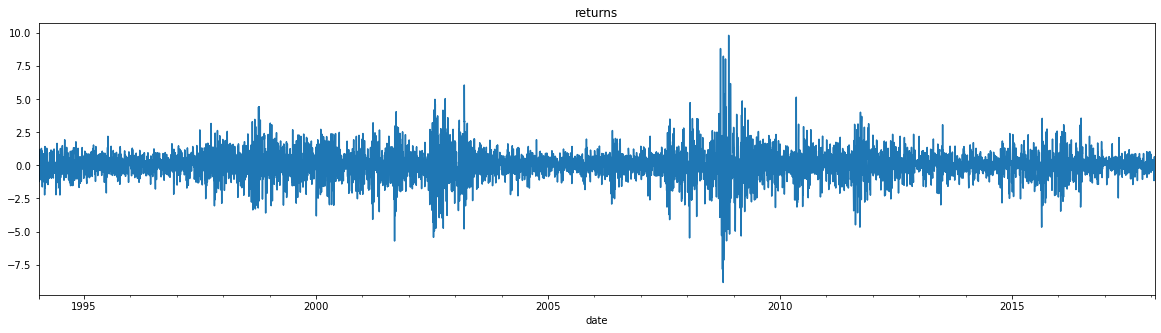

In [47]:
df.returns.plot(figsize=(20,5))
plt.title('returns')
plt.show()